# Unsupervised Learning: Final Project
### Project Details
This project will look at data from the UCI Machine Learning Repository focused on detecting Parkinson's disease using Oxford Parkinson's Disease Detection Dataset. This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. I will be attempting various unsupervised learning methods, starting with clustering, to determine where the groups lie and if those match to the actual values.

#### Goal
In achieving the goal for this project we will have a better idea of how the feature set provided in this data set segment the project. This will give an idea if they are appropriate enough to be able to classify the specfic type of disease or if more information would be better to allow a doctor to make that determination.

##### Data
In this final project we shall analyze the analyze the Oxford Parkinson's Disease Detection Dataset, based on clinical attributes of a patient.
We use the dataset proivded by UCI Machine Learning Repository, and this dataset cab be downloaded from here: https://archive-beta.ics.uci.edu/dataset/174/parkinsons

##### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from itertools import permutations
import warnings

##### Data Exploration

In [2]:
data = pd.read_csv('parkinsons.data')
datashape = data.shape
df=pd.DataFrame(data)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##### Data Cleaning

In [3]:
df.drop('name', axis=1, inplace=True)
# Replace numberic values of disease with actual name value
statusdictionary = {1: 'Yes', 0: 'No'}
df['status'] = [statusdictionary[x] for x in data.status]

##### EDA (Exploratory Data Analysis)

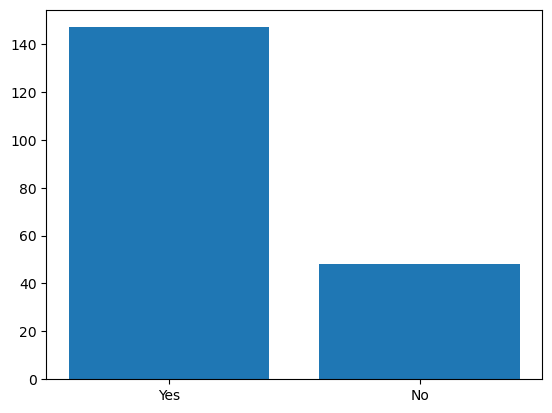

In [4]:
# Perform EDA
count = df['status'].value_counts()
plt.bar(count.index, count.values)
plt.show()

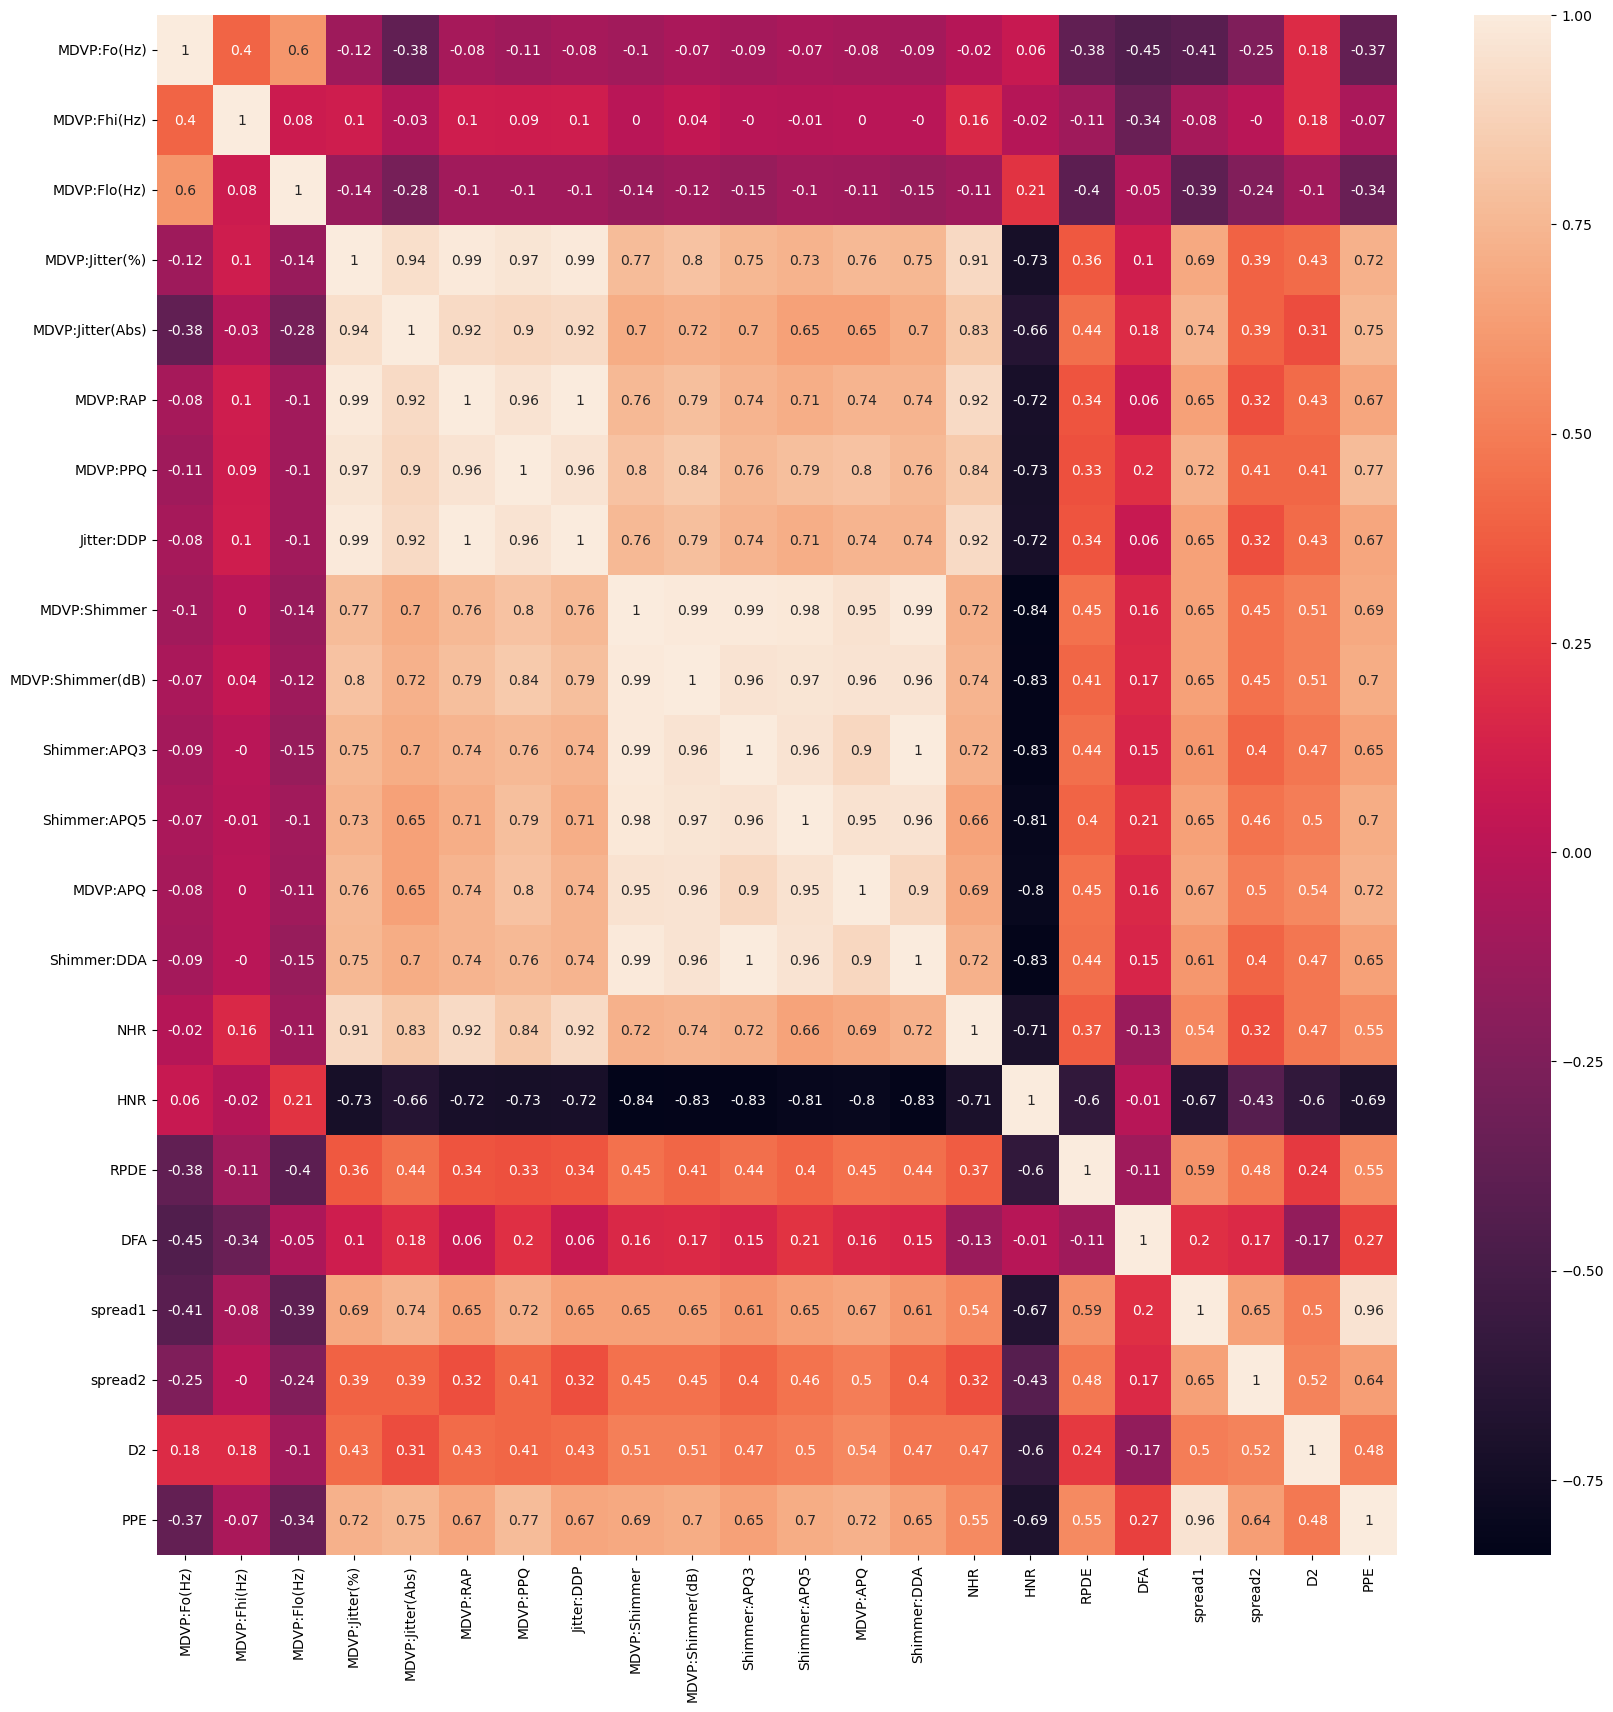

In [5]:
warnings.simplefilter("ignore")
fig, ax = plt.subplots(figsize=(20,20))
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Model Building
###### Create unsupervised machine learning model

In [6]:
# Create model(s)
clusterModel = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward').fit(df.drop('status', axis=1))
warnings.simplefilter("ignore")
print(clusterModel)
print(clusterModel.labels_)

AgglomerativeClustering(affinity='euclidean', n_clusters=11)
[ 1  1  1  1  1  1  1  1  1  1  1  1  7  9  9  3  5  3  9  6  9  9  3  3
  3  3  3  3  3  3 10 10 10 10 10 10  6  6  6  6  6  6  4  4  4  4  4  4
  1  1  1  1  1  1  1  1  1  1  1  5  8  8 10  4  4  8  9  9  9  9  9  9
  1  0  1  1  1  1  1  1  1  1  1  1  3  6  6  6  3  6  3  7  7  9  9  7
  7  1  1  1  1  1  0  9  7  7  7  7  7  3  8 10 10 10  8  2  2  2  2  8
  2  3  3  3  3  3  3  3  1  1  1  1  1  1  1  1  1  1  1  1  3  8  6  8
  6  8  6  6  6  0  6  6  6  1  1  1  1  1  1  1  1  1  1  1  1  8  4  4
  8  4  4  1  1  1  1  1  1  6  7  7  7  7  7  1  3  1  0  0  1  8  3  8
  3  2  8]


In [7]:
# Model accuracy function for permutations
def label_permute_compare(ytdf,yp,vals):
    best_combo = None
    best_accuracy = 0

    n = len(vals)
    perms = permutations(range(n),n)
    
    for perm in perms:
        new_series = ytdf.replace(to_replace=vals, value=perm)
        
        accuracy = metrics.accuracy_score(new_series, yp)
        # print(perm, accuracy)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combo = perm
            
    return (best_combo, best_accuracy)

In [8]:
# Determine accuracy of model
permutation, accuracy = label_permute_compare(df.status, clusterModel.labels_, statusdictionary.values())
print(f"Accuracy: {accuracy}, label permutation: {permutation}")

Accuracy: 0.30256410256410254, label permutation: (1, 0)


In [9]:
# Confusion matrix to visualize bad accuracy
value = df.status.replace(to_replace=statusdictionary.values(), 
                                                       value=permutation)

metrics.confusion_matrix(value, clusterModel.labels_)

array([[ 2, 15,  1,  3, 12,  0,  0,  0,  8,  0,  7],
       [ 3, 57,  5, 22,  0,  2, 20, 15,  6, 14,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [11]:
# Programmatically look for best combination of linkage and distance metrics

affinity = ['l1', 'l2', 'manhattan', 'cosine']
linkage  = ['complete', 'average', 'single']
linkage_distance_metrics = [(aff, link) for aff in affinity 
                                        for link in linkage]
linkage_distance_metrics.append(('euclidean','ward'))

best_model = None
best_accuracy = 0
best_aff = None
best_link = None
out_labels = None

for aff, link in linkage_distance_metrics:
    model = AgglomerativeClustering(n_clusters=11, affinity=aff, linkage=link).fit(df.drop('status', axis=1))
    labelorder, acc = label_permute_compare(df.status, model.labels_, statusdictionary.values())
    #warnings.warn("deprecated", DeprecationWarning)
    warnings.simplefilter("ignore")
    print(f"Affinity: {aff}, Linkage: {link}, Accuracy: {acc:0.4f}")
    
    if acc > best_accuracy:
        best_model = model
        best_accuracy = acc
        best_aff = aff
        best_link = link
        out_labels = labelorder

print()
print(f"The best model was one with linkage set to {best_link} and affinity {best_aff}.")
print(f"Accuracy of this model was {best_accuracy:0.4f} with the following confusion matrix.")

value = df.status.replace(to_replace=statusdictionary.values(), value=permutation)
metrics.confusion_matrix(value, clusterModel.labels_)



def function_that_warns():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    function_that_warns()  # this will not show a warning

Affinity: l1, Linkage: complete, Accuracy: 0.2256
Affinity: l1, Linkage: average, Accuracy: 0.2000
Affinity: l1, Linkage: single, Accuracy: 0.7026
Affinity: l2, Linkage: complete, Accuracy: 0.2872
Affinity: l2, Linkage: average, Accuracy: 0.3897
Affinity: l2, Linkage: single, Accuracy: 0.7026
Affinity: manhattan, Linkage: complete, Accuracy: 0.2256
Affinity: manhattan, Linkage: average, Accuracy: 0.2000
Affinity: manhattan, Linkage: single, Accuracy: 0.7026
Affinity: cosine, Linkage: complete, Accuracy: 0.2615
Affinity: cosine, Linkage: average, Accuracy: 0.2000
Affinity: cosine, Linkage: single, Accuracy: 0.4718
Affinity: euclidean, Linkage: ward, Accuracy: 0.3026

The best model was one with linkage set to single and affinity l1.
Accuracy of this model was 0.7026 with the following confusion matrix.


#### Conclusions
As we can see, the accuracy not very good, with best combination reaching an accuracy of 0.7026. Looking at the confusion matrix we can see many instances of misclassification.
Atthis point we need to bring some clinical experts, to understand what could be some of the overlapping features, that could results in Parkinsons.
There may also be some features that we are missing.

We do believe that information from domain experts is required to understand this more.